In [67]:
#Exploring cluster and imputation

include("readclassjson.jl")
data = readclassjson("impute_clusters.json")
U_train = data["U_train"]
U_test = data["U_test"]

750×2 Matrix{Float64}:
  1.46891    0.641155
  0.152478  -1.13645
 -0.154458   1.1254
 -1.63377   -0.730167
 -1.76303   -1.43932
  0.114878  -1.03053
  0.816086   0.539652
 -0.120205   0.396813
  0.850176   0.133664
 -1.93339   -1.64838
  0.880001   0.207469
 -1.44234   -0.889097
 -0.823596  -0.529588
  ⋮         
  1.35895    0.516693
  0.221058   3.2788
 -0.582232   1.25458
 -1.69374   -1.08454
  0.948762   0.151755
 -0.359042   0.0761012
  1.69274    0.227768
 -1.76919   -1.48937
 -0.353427   1.15769
 -0.989329  -0.378932
  0.91958    0.0536509
 -1.65571   -1.01005

In [68]:
theta_a = sum(eachrow(U_train)) / size(U_train, 1)

2-element Vector{Float64}:
 -0.03620320452121448
  0.1402996818339937

In [69]:
using Statistics
theta_b =[median(U_train[:, 1]), median(U_train[:, 2])]

2-element Vector{Float64}:
 -0.07803491813728365
  0.19034339232244657

In [70]:
using Clustering
using LinearAlgebra

function assign(entry, theta)
    ds = zeros(size(theta, 2))
    for i in 1:size(ds, 1)
        ds[i] = norm(theta[:, i] .- entry)
    end
    return argmin(ds)
end
        

function predict(U, model)
    theta = model.centers
    U_hat = copy(U)
    for i in 1:size(U, 1)
        k = assign(U[i, :], theta)
        j = rand((1, 2))
        U_hat[i, j] = theta[j, k]
    end
    return theta, U_hat
end

r_5 = kmeans(transpose(U_train), 5)
@assert nclusters(r_5) == 5
theta_5, U_5_hat = predict(U_test, r_5)

r_10 = kmeans(transpose(U_train), 10)
@assert nclusters(r_10) == 10
theta_10, U_10_hat = predict(U_test, r_10)

r_15 = kmeans(transpose(U_train), 15)
@assert nclusters(r_15) == 15
theta_15, U_15_hat = predict(U_test, r_15)

r_20 = kmeans(transpose(U_train), 20)
@assert nclusters(r_20) == 20
theta_20, U_20_hat = predict(U_test, r_20)

([-0.32387054065698523 -1.88218437323067 … -1.6988883513219069 1.0249293940508253; 1.106060056323115 -1.5212145070428036 … -0.9277460656781276 0.6843854745681406], [1.4689095398122813 0.6786869086032682; 0.15247819016693423 -1.282778502160174; … ; 0.9195799321607253 0.14844838630325424; -1.6988883513219069 -1.0100453244189813])

In [71]:
println(theta_a)
println(theta_b)

[-0.03620320452121448, 0.1402996818339937]
[-0.07803491813728365, 0.19034339232244657]


In [72]:
println(theta_5)
println(theta_10)
println(theta_15)
println(theta_20)

[-0.95617012339136 0.2756404549274657 1.2873820250660917 -0.29214190150860403 0.8235642107119254; -1.036674236788065 3.3069838006778394 0.5441026936724261 0.74120267853503 0.15018887286534474]
[-0.30297108608598783 -1.824689896192761 0.2756404549274657 0.10444012046028858 1.2873820250660917 -0.36816166284173507 -0.765907941671873 -0.04137529918608483 -1.5688247738212087 0.8301195910264032; 0.09432387288426429 -1.5604347121692828 3.3069838006778394 -1.2809227817079982 0.5441026936724261 1.1412112585726852 -0.7211649565053767 0.4249502272072924 -0.9125825426233026 0.14844838630325424]
[0.8301195910264032 -0.3677517091603425 -1.824689896192761 0.2756404549274657 -0.5280719224718959 0.11247356773510733 1.2091195998532915 -0.2000062082351548 -0.02921643902166141 -0.2227886995415889 -0.5681019313477639 -0.9596600112445156 -1.6358802228268468 1.4517331180129693 -1.471709985606148; 0.14844838630325424 0.06104546259772072 -1.5604347121692828 3.3069838006778394 1.1758705751782537 -1.282778502160

In [73]:
function predict_constant(U, theta)
    U_hat = copy(U)
    for i in 1:size(U, 1)
        j = rand((1, 2))
        U_hat[i, j] = theta[j]
    end
    return U_hat
end

U_a_hat = predict_constant(U_test, theta_a)
U_b_hat = predict_constant(U_test, theta_b)

rms(y, y_hat) = sqrt(sum((y_hat .- y).^2)/size(y, 1))

rms_a = rms(U_test, U_a_hat)
rms_b = rms(U_test, U_b_hat)
rms_5 = rms(U_test, U_5_hat)
rms_10 = rms(U_test, U_10_hat)
rms_15 = rms(U_test, U_15_hat)
rms_20 = rms(U_test, U_20_hat)

# There might be 12 clusters in the data because
# the average imputation RMSE would be small and 
# the apparent clusters would not partitioned.

0.09151357317714667

In [74]:
println(rms_a)
println(rms_b)
println(rms_5)
println(rms_10)
println(rms_15)
println(rms_20)

1.0625286757757753
1.1053876283873678
0.38729736668625236
0.15661630808820223
0.10515352195881625
0.09151357317714667


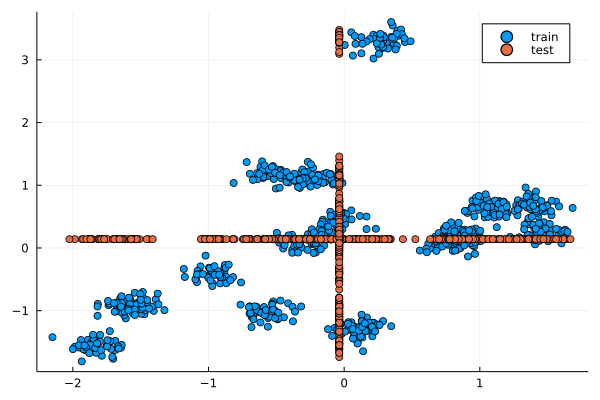

In [75]:
using Plots

scatter(U_train[:, 1], U_train[:, 2], label = "train")
scatter!(U_a_hat[:, 1], U_a_hat[:, 2], label = "test")

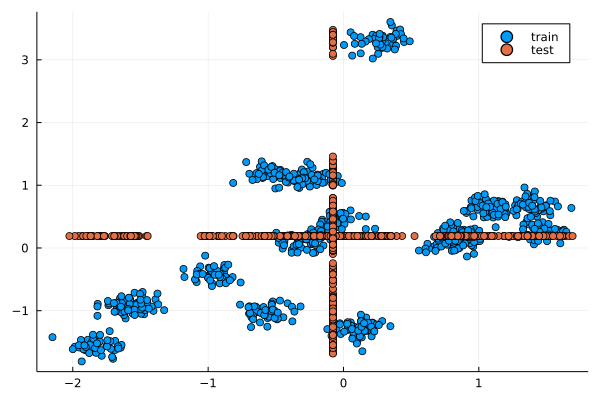

In [76]:
scatter(U_train[:, 1], U_train[:, 2], label = "train")
scatter!(U_b_hat[:, 1], U_b_hat[:, 2], label = "test")

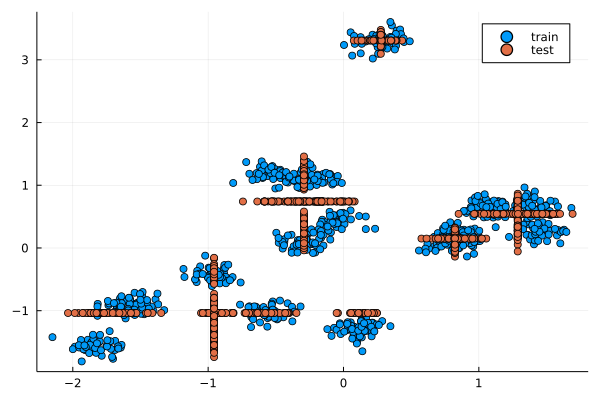

In [77]:
scatter(U_train[:, 1], U_train[:, 2], label = "train")
scatter!(U_5_hat[:, 1], U_5_hat[:, 2], label = "test")

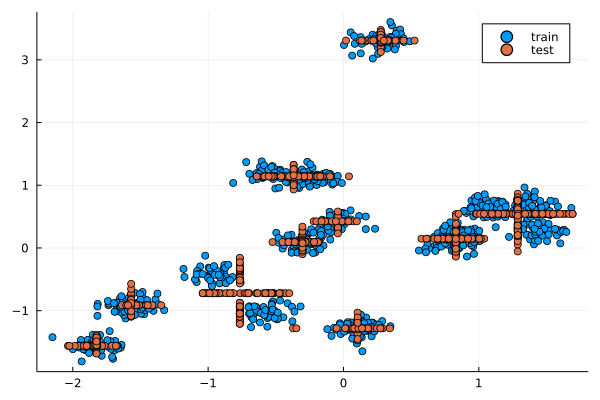

In [78]:
scatter(U_train[:, 1], U_train[:, 2], label = "train")
scatter!(U_10_hat[:, 1], U_10_hat[:, 2], label = "test")

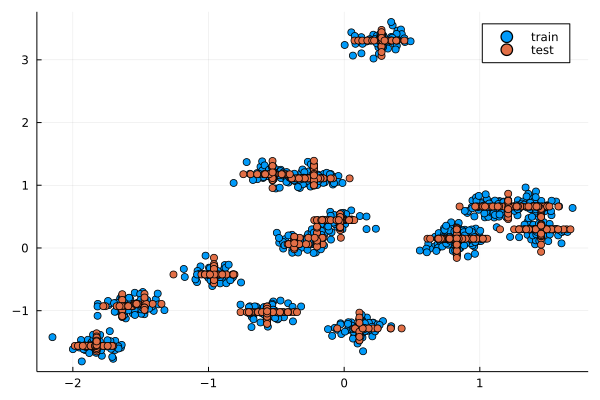

In [79]:
scatter(U_train[:, 1], U_train[:, 2], label = "train")
scatter!(U_15_hat[:, 1], U_15_hat[:, 2], label = "test")

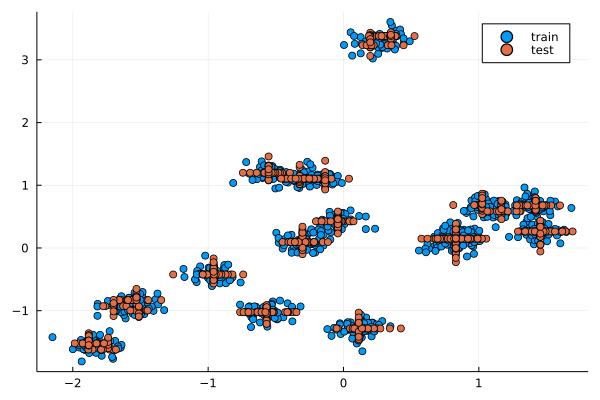

In [80]:
scatter(U_train[:, 1], U_train[:, 2], label = "train")
scatter!(U_20_hat[:, 1], U_20_hat[:, 2], label = "test")